In [32]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
N = 6
Rsi = 5
I = 2

total = N + I

# SI Model transition rates
Q = np.zeros((N + I + 1, N + I + 1))

## For this model, when total - i = 0, i.e. there are no infectives then
## the rate of going anywhere is 0
for i in range(1, total): # Start at population 1 and only go up to total - 1
    Q[i, i] = - Rsi * i * (total - i)
    Q[i, i - 1] = Rsi * i * (total - i)

print(Q)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 35. -35.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  60. -60.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  75. -75.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  80. -80.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  75. -75.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  60. -60.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  35. -35.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [3]:
a = Q / (- np.diag(Q)[:, None])
print(a)

[[nan nan nan nan nan nan nan nan nan]
 [ 1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.]
 [nan nan nan nan nan nan nan nan nan]]


C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [4]:
def doobGillespie(Q, currState):
    times = []
    Pjump = Q / (- np.diag(Q)[:, None])
    np.fill_diagonal(Pjump, 0)
    np.nan_to_num(Pjump, copy=False)

    state = currState
    # print(- np.diag(Q)[state])
    timeSpent = np.random.exponential(scale=1/(- np.diag(Q)[state]))
    times.append(timeSpent)
    state = np.random.choice(range(0, Q.shape[0]), p=Pjump[state, :])
    # print(state)
    while state != 0 and (state != Q.shape[0] - 1):
        # print(- np.diag(Q)[state])
        timeSpent = np.random.exponential(scale=1/(- np.diag(Q)[state]))
        times.append(times[-1] + timeSpent)
        state = np.random.choice(range(0, Q.shape[0]), p=Pjump[state, :])
        # print(state)
    return times

In [5]:
doobGillespie(Q, N)

C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[0.006115723181687569,
 0.010219099639574198,
 0.011875848215160002,
 0.026905968781398733,
 0.043144399651930176,
 0.055535731335171104]

In [9]:
approx = lambda N, I, Rsi, j : np.log(
                        N * (N + I + 1 - j) * (1/(I * (j - 1)))
                    ) / (Rsi * (N + I))

In [7]:
approx(N, I, 2)

0.07611306094308558

In [10]:
Ns = range(6, 20)
Rs = list(np.linspace(0.1, 3, num=10, endpoint=True))

errors = np.zeros((len(Ns), len(Rs)))

for n, N in enumerate(Ns, 0):
    for r, Rsi in enumerate(Rs, 0):
        trials = 5000
        timings = np.zeros((trials, N))
        # [
        # [t_N t_(N-1) ... t_1 ]
        
        I = 2
        total = N + I
        Q = np.zeros((N + I + 1, N + I + 1))
        ## For this model, when total - i = 0, i.e. there are no infectives then
        ## the rate of going anywhere is 0
        for i in range(1, total): # Start at population 1 and only go up to total - 1
            Q[i, i] = - Rsi * i * (total - i)
            Q[i, i - 1] = Rsi * i * (total - i)
        
        for i in range(trials):
            timings[i, :] = doobGillespie(Q, N)
        
        avg = np.average(timings, axis=0) 
        a = [approx(N, I, Rsi, j) for j in range(2, N + 1)] 
        errors[n, r] = r2_score(a, list(reversed(avg))[1:])

C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel pack

C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel pack

C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel pack

C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel pack

In [33]:
list(np.linspace(0, 3, num=20, endpoint=True))

[0.0,
 0.15789473684210525,
 0.3157894736842105,
 0.47368421052631576,
 0.631578947368421,
 0.7894736842105263,
 0.9473684210526315,
 1.1052631578947367,
 1.263157894736842,
 1.4210526315789473,
 1.5789473684210527,
 1.7368421052631577,
 1.894736842105263,
 2.052631578947368,
 2.2105263157894735,
 2.3684210526315788,
 2.526315789473684,
 2.6842105263157894,
 2.8421052631578947,
 3.0]

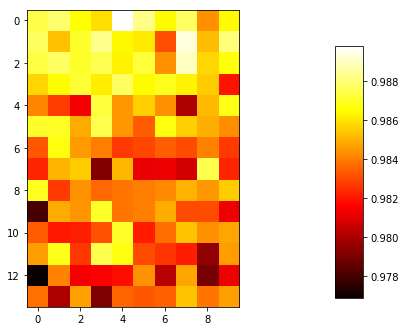

In [33]:
fig = figure(figsize=(8, 5))
im = plt.imshow(errors, cmap='hot', interpolation='nearest')

plt.subplots_adjust(left=0.1, top=0.95, right=0.9)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [31]:
r2_score(a, list(reversed(avg))[1:])

0.988022307642396

In [9]:
list(enumerate([5, 6, 7 , 8], 0))

[(0, 5), (1, 6), (2, 7), (3, 8)]